In [1]:
# pip install -r /config/workspace/requirements.txt

In [1]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
## Load the flower dataset
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/155646858_9a8b5e8fc8.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8689302980_9bd2f7b9fe_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18889216716_cd67aec890_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5670543216_8c4cb0caa8_m.jpg')]

In [8]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg')]

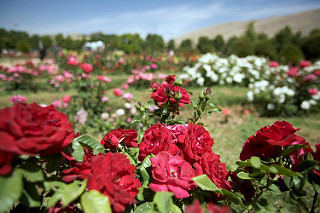

In [10]:
PIL.Image.open(str(roses[1]))

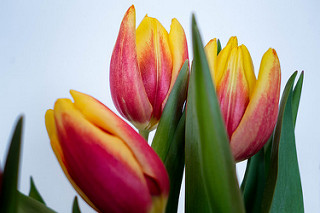

In [11]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [12]:
## Reading the flower Images from the sisk into numpy array using opencv

## storing the list of images in the form of dictionay

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'

In [16]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img.shape

(222, 320, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
x,y=[],[]
for flower_name , images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resize_img=cv2.resize(img,(180,180))
        x.append(resize_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
len(x),len(y)

(3670, 3670)

In [21]:
x=np.array(x)
y=np.array(y)

In [22]:
x.shape,y.shape

((3670, 180, 180, 3), (3670,))

In [23]:
##  train test spit

from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=.25,random_state=42)

In [24]:
x_train.shape,y_train.shape

((2752, 180, 180, 3), (2752,))

In [25]:
## Data preprocessing

x_train = x_train/255
x_test = x_test/255

In [26]:
x_train.shape,y_train.shape

((2752, 180, 180, 3), (2752,))

In [27]:
## Building a CNN Model and traning

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 21ms/step - loss: 1.2822 - accuracy: 0.4495
Epoch 2/30
86/86 [==============================] - 2s 22ms/step - loss: 0.9572 - accuracy: 0.6261
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.7329 - accuracy: 0.7173
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.5279 - accuracy: 0.8049
Epoch 5/30
86/86 [==============================] - 2s 20ms/step - loss: 0.3339 - accuracy: 0.8841
Epoch 6/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1950 - accuracy: 0.9379
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1187 - accuracy: 0.9644
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0621 - accuracy: 0.9836
Epoch 9/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0304 - accuracy: 0.9953
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0141 - accuracy: 0.9978
Epoch 11/

In [28]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 1s 20ms/step - loss: 2.3025 - accuracy: 0.6416


[2.30246639251709, 0.64161217212677]

In [29]:
prediction=model.predict(x_test)
prediction

29/29 [==============================] - 1s 8ms/step


array([[ 18.53112   , -15.063444  , -10.871864  , -18.345676  ,
         10.596685  ],
       [ -4.1983833 ,   4.465487  ,  -1.8709644 ,   4.1099563 ,
         -5.630684  ],
       [ -7.524702  , -12.737658  ,  -1.7532216 ,  19.213863  ,
          8.919523  ],
       ...,
       [-12.711385  ,   4.113387  ,   2.6785166 ,   5.4838195 ,
         -1.8320267 ],
       [ -8.1026    ,  -1.608147  ,   0.36975515,   9.058131  ,
         -3.9336038 ],
       [ -0.7740712 ,   0.11126759,   4.340898  ,  -6.8525    ,
         -2.4568665 ]], dtype=float32)

In [30]:
score=tf.nn.softmax(prediction[0])

In [31]:
np.argmax(score)

0

In [32]:
y_test[0]

0

In [33]:
## Improving the test accuracy using data augmentation

data_augmentation=keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

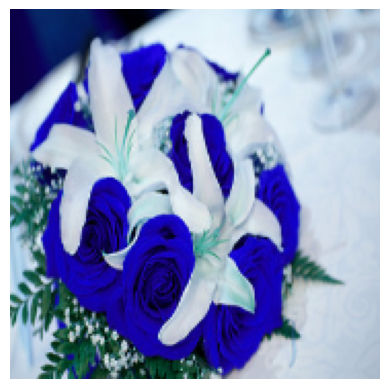

In [34]:
plt.axis('off')
plt.imshow(x[0])

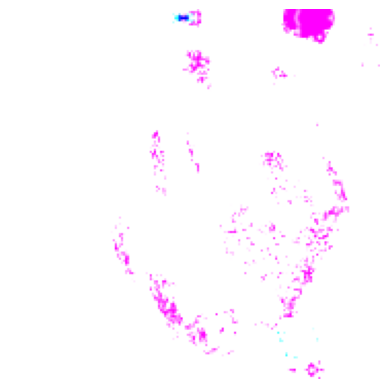

In [35]:
## Newly generated image using data augmentation

plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy())

In [36]:
## traning te model using data augmentaion and droupout layer

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 27ms/step - loss: 1.3175 - accuracy: 0.4528
Epoch 2/30
86/86 [==============================] - 2s 26ms/step - loss: 1.0432 - accuracy: 0.5763
Epoch 3/30
86/86 [==============================] - 2s 26ms/step - loss: 0.9307 - accuracy: 0.6439
Epoch 4/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8744 - accuracy: 0.6635
Epoch 5/30
86/86 [==============================] - 2s 29ms/step - loss: 0.8392 - accuracy: 0.6806
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7670 - accuracy: 0.7104
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7370 - accuracy: 0.7191
Epoch 8/30
86/86 [==============================] - 3s 31ms/step - loss: 0.7110 - accuracy: 0.7304
Epoch 9/30
86/86 [==============================] - 3s 32ms/step - loss: 0.6646 - accuracy: 0.7445
Epoch 10/30
86/86 [==============================] - 3s 36ms/step - loss: 0.6599 - accuracy: 0.7504
Epoch 11/

In [37]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 0s 12ms/step - loss: 0.9419 - accuracy: 0.7331


[0.9419216513633728, 0.7331154942512512]

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.%